This task requires the use of Kmeans or GMM to solve a clustering task, for this, kmeans is selected

The Elboow method and Silhoutte score chart are statistical techniques used to determine the optimal number of clusters and assess cluster quality, with higher scores indicating more clearly defined clusters (Patel & Kushwaha, 2020). Thus, the analysis is utilizing them.

In [2]:
#To start we have to import important libararies (Brownlee, 2020)
import pandas as pd   # To import the data from the CSV files.
import numpy as np    # To implement k-means.
import matplotlib.pyplot as plt # To visualise the data.
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Load the dataset and check the size to ensure no data has been lost 
task1 = pd.read_csv('cluster2.csv', header=None).values
print("|| task 1: " + str(task1.shape)+"||")

|| task 1: (1000, 2)||


Text(0.5, 1.0, 'Initial Scatter plot')

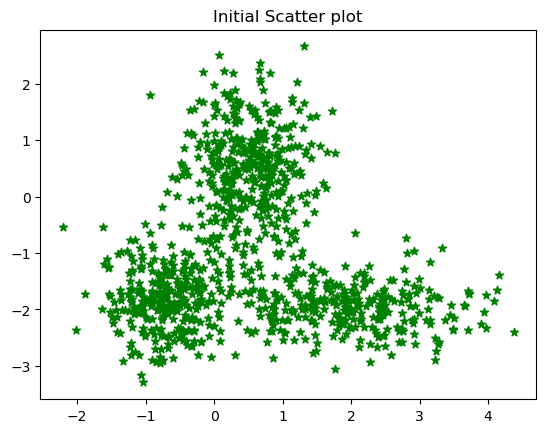

In [3]:
# Creating a figure and axis for the scatter plot
plt.scatter(task1[:,0], task1[:,1], color='green', marker="*")
plt.title("Initial Scatter plot")# Creating a figure and axis for the scatter plot


Data visualization is crucial in clustering, aiding in the identification of high-density regions and meaningful clusters, influencing algorithm choice and cluster usage.

In [4]:
#Starting with the elbow method, firstly the error drop is checked in terms of figures as seen below then the visual representation after
inertia = []
for i in range (1,11):
    kmeans = KMeans (n_clusters = i)
    pred = kmeans.fit_predict(task1)
    inertia.append(kmeans.inertia_)  
print(inertia)


[3180.038258180889, 2095.7573602265543, 705.9218507355704, 557.983863710165, 441.0046376439134, 394.3139878456254, 346.5835695890745, 301.8817763216917, 284.27487087301654, 239.52623305555784]


As seen here, there is a huge error drop between the second to the third point, the plot below confirms this.

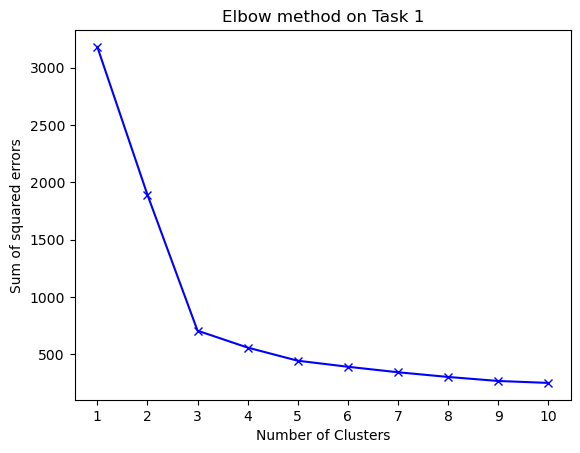

In [5]:
#using elbow method here to determine the optimal value of clusters
def elbow_methos(data,title):
    inertia_=[]
    for i in range(1,11):  #using 1,11 as we cannot start from 0, and this runs and stops at the second to the last number
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data) #fitting the KMeans model to the data and predict cluster labels
        inertia_.append(kmeans.inertia_)
    plt.plot(range(1,11), inertia_, '-bx')
    plt.title(title)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of squared errors')
    plt.xticks([1,2,3,4,5,6,7,8,9,10])
    plt.show()
elbow_methos(task1, 'Elbow method on Task 1')


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Due to the warnings from initial result, importing warnings is being implemented
#To prevent clutter in oputput, future warnings are being suppressed by doing so, which indicate potential changes in default behavior

In [6]:
#Next we have the silhoutte analysis, where the average scored are first shown in figures before the chart

Number of clusters: 2
Average Silhouette Score: 0.44229037880472927
Number of clusters: 3
Average Silhouette Score: 0.5738307485410833
Number of clusters: 4
Average Silhouette Score: 0.485356598623045
Number of clusters: 5
Average Silhouette Score: 0.4280898687975923
Number of clusters: 6
Average Silhouette Score: 0.394011957292537
Number of clusters: 7
Average Silhouette Score: 0.34609892096730344
Number of clusters: 8
Average Silhouette Score: 0.34732259891699985
Number of clusters: 9
Average Silhouette Score: 0.3254682494326122
Number of clusters: 10
Average Silhouette Score: 0.32302181700555016


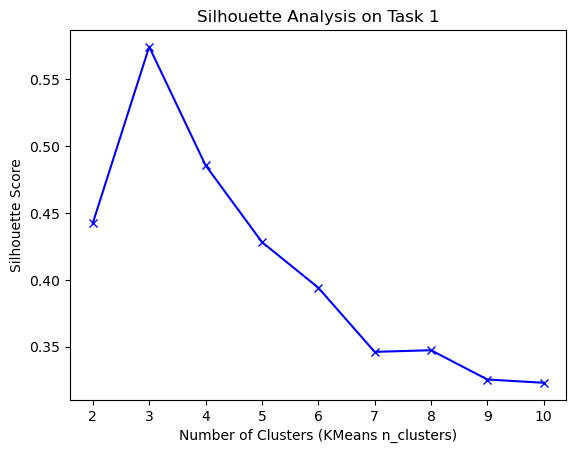

In [7]:
#using silhouette analysis here to determine the optimal value of clusters
def silhouette_score_chart(title, data):
    silhouette_scores = []
    for num_of_cluster in range(2, 11):
        kmeans = KMeans(n_clusters=num_of_cluster)
        pred = kmeans.fit_predict(data)
        score = silhouette_score(data, pred)
        print("Number of clusters: " + str(num_of_cluster) + "\nAverage Silhouette Score: " + str(score))
        silhouette_scores.append(score)
    plt.plot(range(2,11), silhouette_scores, '-bx')
    plt.title(title)
    plt.xlabel('Number of Clusters (KMeans n_clusters)')
    plt.ylabel('Silhouette Score')
    plt.show()

silhouette_score_chart("Silhouette Analysis on Task 1", task1)

In [8]:
#Both anaylsis show that 3 clusters is the best option, hence the kmeans is applied below 

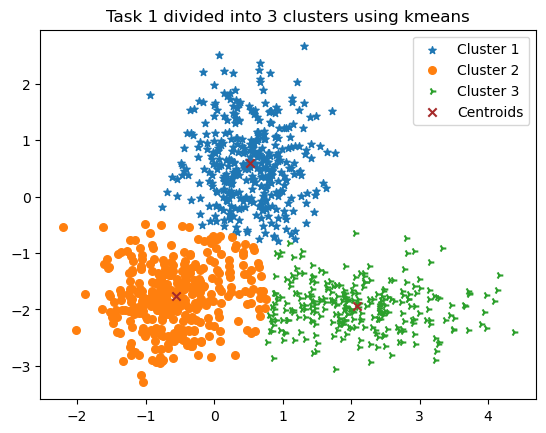

In [9]:
#Initialising of Kmeans
#The use init='k-means++' to initialize a 3-cluster KMeans object KMeans++ improves clustering performance by choosing distant starting centroids (Sklearn.cluster.kmeans 2024).
kmeans = KMeans (n_clusters=3, n_init=10, init='k-means++')

#fit Kmeans and compute cluster centers and predict cluster index
pred = kmeans.fit_predict(task1)

# visualising cluster points and centroids to understand data grouping and cluster center locations
def plot(data, pred, title, num_clusters):
    markers = ['*', 'o', '4', '2', '1', '3', 'x']
    for i in range(0, num_clusters):
        cluster_label = "Cluster " + str(i+1)
        plt.scatter(data[pred == i, 0], data[pred == i, 1], s=30, marker=markers[i], label=cluster_label)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", color="brown", label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()
    
#plotting the data points with the respective centroids and clusters
plot(task1, pred, 'Task 1 divided into 3 clusters using kmeans', 3)


# Justification

K-means clustering is a user-friendly method that assigns items iteratively based on their closeness towards centers, unlike Gaussian mixture models (GMMs) (Mahmood et al., 2023). Both elbow method and siloutte analysis consistently identify three clusters as the most suitable number for finding an optimum number. The elbow method detects the inflection point on the inertia curve, while siloutte analysis provides graphic insights into cluster quality, aiding decision-making. 

This integration ensures the selection of appropriate clusters tailored to the dataset, capitalizing on the advantages of K-means clustering.

Patel, E. and Kushwaha, D.S. (2020) ‘Clustering cloud workloads: K-means vs gaussian mixture model’, Procedia Computer Science, 171, pp. 158–167.

Brownlee, J. (2020) 10 clustering algorithms with python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/clustering-algorithms-with-python/ (Accessed: 15 April 2024). 

Mahmood, H., Mehmood, T. and Al-Essa, L.A. (2023) ‘Optimizing clustering algorithms for Anti-Microbial Evaluation Data: A majority score-based evaluation of k-means, gaussian mixture model, and multivariate T-distribution mixtures’, IEEE Access, 11, pp. 79793–79800. 

WORD COUNT-184